In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#data gathering

data=pd.read_csv(r"c:\Users\\acer\\Downloads\iris.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#data preprocessing
data.drop(['Id'],axis=1,inplace=True)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_setosa=data[data[list(data.columns)[-1]]=='iris_setosa']
iris_versicolor=data[data[list(data.columns)[-1]]=='iris_versicolor']
iris_virginia=data[data[list(data.columns)[-1]]=='iris_virginia']


In [8]:
#labeling
from sklearn.preprocessing import LabelEncoder

x=data[list(data.columns)[:-1]]
y=data[list(data.columns)[-1]]

#initialize encoder
encoder=LabelEncoder()
encodedy=encoder.fit_transform(y)

#scaling features
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#initialize scaler
scaler=StandardScaler()
scaler.fit(x)
scaledx=scaler.transform(x)
scaledx

mxscaler=MinMaxScaler()
scaledx=mxscaler.fit_transform(x)
scaledx



array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
#split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(scaledx,encodedy,test_size=0.2,random_state=3)

In [10]:
#modeling
from sklearn import ensemble
#initialize
forest1=ensemble.RandomForestClassifier(random_state=49,warm_start=False,n_estimators=1650,min_samples_split= 38,max_depth=44,criterion= 'entropy',bootstrap= True)
#train model
forest1.fit(xtrain,ytrain)
#test prediction
ypred=forest1.predict(xtest)

ypred==ytest


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [11]:
#evaluate
from sklearn.metrics import f1_score,confusion_matrix

print("Confusion Matrix:\n ",confusion_matrix(ypred,ytest))
print("F1 Score: ",f1_score(ypred,ytest,average=None))

Confusion Matrix:
  [[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
F1 Score:  [1.         0.95238095 0.94736842]


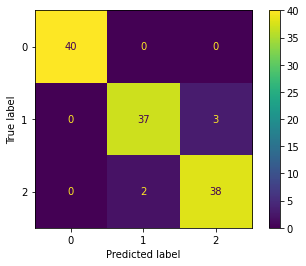

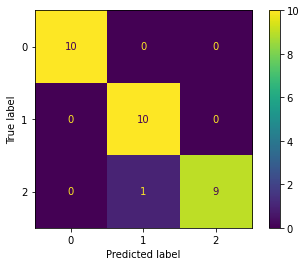

In [12]:
from sklearn import metrics

metrics.plot_confusion_matrix(forest1,xtrain,ytrain)
metrics.plot_confusion_matrix(forest1,xtest,ytest)

In [13]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
model1 = ensemble.RandomForestClassifier(random_state=49)
cv = cross_val_score(
    forest1,scaledx,encodedy,cv=5,scoring='accuracy'
)
cv.mean()

0.9466666666666665

In [14]:
ensemble.RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [15]:
#hyperperameter tuning
from sklearn.model_selection import RandomizedSearchCV

gforest1=ensemble.RandomForestClassifier(random_state=49)

gridforest=RandomizedSearchCV(
    gforest1,
    param_distributions={
        'criterion':['gini','entropy'],
        'n_estimators':list(range(100,2000,50)),
        'max_depth':list(range(5,50,3)),
        'min_samples_split':list(range(2,40,2)),
        'max_features':[None,'auto','sqrt','log2'],
        'bootstrap':[True,False],
        'warm_start':[True,False]
    },
    cv=5,scoring='accuracy',n_iter=50,n_jobs=-1,verbose=3
)
gridforest.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [16]:
gridforest.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

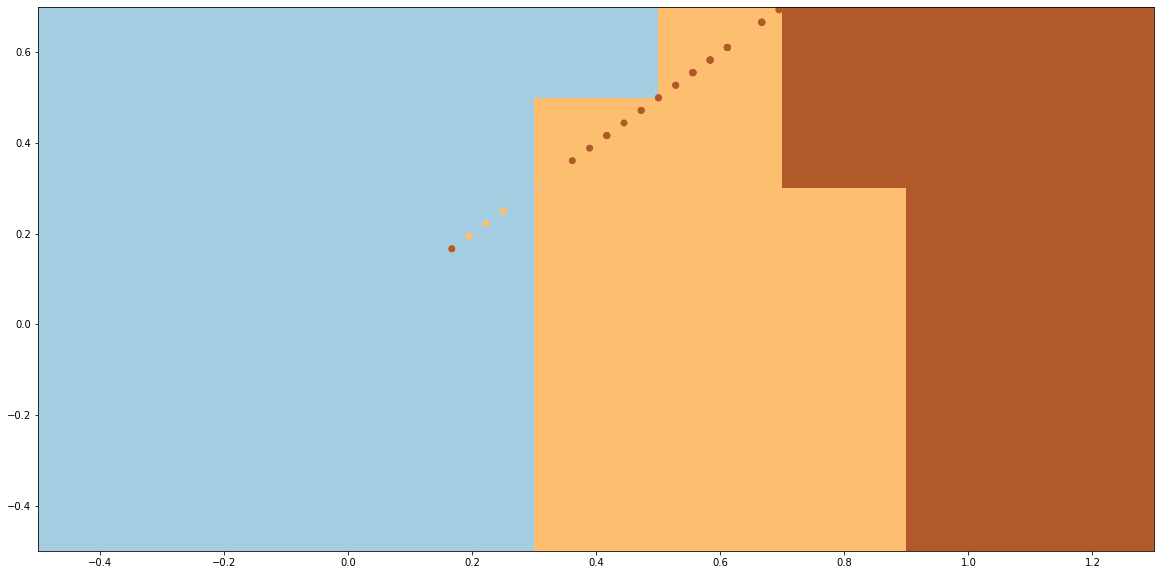

In [17]:
#analysis
forest1=ensemble.RandomForestClassifier()
forest1.fit(scaledx[:,:2],encodedy)

xmin,xmax= scaledx[:,:2][:,0].min()-0.5,scaledx[:,:2][:,0].max()+0.5
ymin,ymax= scaledx[:,:2][:,:1].min()-0.5,scaledx[:,:2][0,:1].max()+0.5

xx,yy=np.meshgrid(np.arange(xmin,xmax,0.2),np.arange(ymin,ymax,0.2))
z=forest1.predict(np.c_[xx.ravel(),yy.ravel()])
#color
z=z.reshape(xx.shape)
plt.figure(1,figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)
#plot
plt.scatter(scaledx[:,:2][:,0],scaledx[:,:2][:,:1],c=encodedy)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

In [26]:
#ml pipeline
from sklearn import pipeline

classifier=ensemble.RandomForestClassifier(random_state=49,warm_start=False,n_estimators=1650,min_samples_split= 38,max_depth=44,criterion= 'entropy',bootstrap= True)
#initialize
pipe=pipeline.Pipeline(
    [
        ('scaler',MinMaxScaler()),
        ('forest1',classifier)
        
    ]

)
#train
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest1',
                 RandomForestClassifier(criterion='entropy', max_depth=44,
                                        min_samples_split=38, n_estimators=1650,
                                        random_state=49))])

In [21]:
data.iloc[0].values

array([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], dtype=object)

In [20]:
data.iloc[99,:-1].values

array([5.7, 2.8, 4.1, 1.3], dtype=object)

In [23]:
indices=np.random.randint(0,149,3)

features=data.iloc[indices,:-1].values
features

array([[5.4, 3.9, 1.3, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [5.5, 2.4, 3.7, 1. ]])

In [31]:
ypred=pipe.predict(features)

In [32]:
encoder.inverse_transform(ypred)

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [33]:
data.iloc[indices].values

array([[5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'],
       [5.5, 2.4, 3.7, 1.0, 'Iris-versicolor']], dtype=object)